# Data Anaylsis of Hacker News Posts 
### By J. Stewart

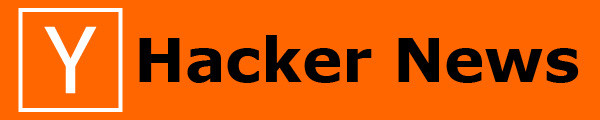

<a id="Contents"></a>
## Contents
1. [Introduction](#Introduction)
2. [Objective](#Objective)
3. [Opening the Dataset](#Opening_the_Dataset)
4. [Filter Dataset](#Filter_Dataset)
5. [Average Comments per Post](#avg_comments)
6. [Ask Posts: Number of Posts for each Hour](#hour_posts)
7. [Conclusion](#conclusion)


<a id="Introduction"></a>
## Introduction

For this project, data analysis will be performed with data collected by Hacker News, a site started by the starup incubator Y combinator. The data consist of approximately 300,000 rows which include user collected data on various user post submissions. The dataset utilized for this project consists of approximately 20,000 rows due to the removal of submissions that didn't receive and then random sampling of the remaining submissions. 
Description of the columns:
> * __`id`__: the unique identifier from Hacker News for the post
> * __`title`__: the title of the post
> * __`url`__: the URL that the posts links to, if the post has a URL
> * __`num_points`__: the number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
> * __`num_comments`__: the number of comments on the post
> * __`author`__: the username of the person who submitted the post
> * __`created_at`__: the date and time of the post's submission

This analysis will focus on posts that begin with `Ask HN` or `Show HN` Post that askes the Hacker News commmunity a specific question or shares a project or product with the Hacker News community respectively. 
Examples:
> * Ask HN: How to improve my personal website?
> * Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform

<a id="Objective"></a>
## Objective

Compare the two types of posts (`Ask HN` and `Show HN`) to determine the following:
* Do `Ask HN` or `Show HN` receive more comments on average?
* Do posts created at a certain time receive more comments on average?

<a id="Opening_the_Dataset"></a>
## Opening the Dataset

In [64]:
# open dataset 
from csv import reader
opened_file = open("hacker_news.csv")
read_file = reader(opened_file)
hn = list(read_file)

# preview first five rows

print(hn[:5])


[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']]


In [65]:
#separate header columns

headers = hn[0]
hn = hn[1:]

#verify separation
print(headers)

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


In [66]:
print(hn[:5])

[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'], ['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']]


<a id="Filter Dataset"></a>
# Filter Dataset

In [67]:
# create empty lists and loop through dataset to filter into respective list
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    l_title = title.lower() #change title to lowercase to account for capitlization variations
    if l_title.startswith("ask hn"):
        ask_posts.append(row)
    elif l_title.startswith("show hn"):
        show_posts.append(row)
    else:
        other_posts.append(row)

# verify lists
print(ask_posts[:2])
print("\n")
print(show_posts[:2])
print("\n")
print(other_posts[:2])

print("\n") 

# print number of posts for each list
print(len(ask_posts))
print(len(show_posts))
print(len(other_posts))
        
   
    


[['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55'], ['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43']]


[['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03'], ['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46']]


[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']]


1744
1162
17194


__Number of posts for each list__
`ask_posts`: 1744 posts
`show_posts`: 1162 posts
`other_posts`:17194 posts

<a id="avg_comments"></a>
# Average Comments per Post

In [68]:
#determine total number of comments in ask posts
total_ask_comments = 0
sum_ask_comments = 0

for post in ask_posts:
    num_comments = int(post[4])
    total_ask_comments += 1
    sum_ask_comments += num_comments
    
#determine average num of comments for ask posts
avg_ask_comments = sum_ask_comments / total_ask_comments
print("avg ask commments:")
print(avg_ask_comments)

print("\n") 

#determine total number of comments in show posts
total_show_comments = 0
sum_show_comments = 0

for post in show_posts:
    num_comments = int(post[4])
    total_show_comments += 1
    sum_show_comments += num_comments
    
#determine average num of comments for show posts
avg_show_comments = sum_show_comments / total_show_comments
print("avg show commments:")
print(avg_show_comments)

avg ask commments:
14.038417431192661


avg show commments:
10.31669535283993


__Summary:__ On average, ask posts tend to receive more comments than show posts. Ask posts tend to receive an an average of four additional posts than show posts

<a id="hour_posts"></a>
# Ask Posts: Number of Posts for each Hour

In [69]:
import datetime as dt

# create list consisting of created_at and num_comments columns
result_list = []

for post in ask_posts:
    created_at = post[6]
    num_comments = int(post[4])
    result_list.append([created_at, num_comments]) 
    
#Create emppty dictionaries

counts_by_hour = {}  # dictionary that will hold the number of posts in per hour
comments_by_hour = {} # dictionary that will hold the number of comments per hour

for result in result_list:
    date = result[0]
    num_coms = int(result[1])
    dt_date = dt.datetime.strptime(date, "%m/%d/%Y %H:%M") # making the date column to be a datetime object
    hour = dt_date.strftime("%H") # Extracting the hour of that datetime object
   
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = num_coms
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += num_coms
        
print('The number of ask_posts in each hour:\n', counts_by_hour, '\n')  
print('The number of comments in each hour:\n', comments_by_hour)

The number of ask_posts in each hour:
 {'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58} 

The number of comments in each hour:
 {'09': 251, '13': 1253, '10': 793, '14': 1416, '16': 1814, '23': 543, '12': 687, '17': 1146, '15': 4477, '21': 1745, '20': 1722, '02': 1381, '18': 1439, '03': 421, '05': 464, '19': 1188, '01': 683, '22': 479, '08': 492, '04': 337, '00': 447, '06': 397, '07': 267, '11': 641}


In [70]:
avg_by_hour = [] # a list that will contain the hour and average comments per post in that hour

for hour in comments_by_hour:
    average = comments_by_hour[hour] / counts_by_hour[hour]
    avg_by_hour.append([hour, average])
    
print('Average number of comments per post by hour:')
avg_by_hour


Average number of comments per post by hour:


[['09', 5.5777777777777775],
 ['13', 14.741176470588234],
 ['10', 13.440677966101696],
 ['14', 13.233644859813085],
 ['16', 16.796296296296298],
 ['23', 7.985294117647059],
 ['12', 9.41095890410959],
 ['17', 11.46],
 ['15', 38.5948275862069],
 ['21', 16.009174311926607],
 ['20', 21.525],
 ['02', 23.810344827586206],
 ['18', 13.20183486238532],
 ['03', 7.796296296296297],
 ['05', 10.08695652173913],
 ['19', 10.8],
 ['01', 11.383333333333333],
 ['22', 6.746478873239437],
 ['08', 10.25],
 ['04', 7.170212765957447],
 ['00', 8.127272727272727],
 ['06', 9.022727272727273],
 ['07', 7.852941176470588],
 ['11', 11.051724137931034]]

In [71]:
swap_avg_by_hour = []
for row in avg_by_hour:
    swap_avg_by_hour.append([row[1], row[0]]) # interchanging rows and columns for sorting
    
swap_avg_by_hour  

[[5.5777777777777775, '09'],
 [14.741176470588234, '13'],
 [13.440677966101696, '10'],
 [13.233644859813085, '14'],
 [16.796296296296298, '16'],
 [7.985294117647059, '23'],
 [9.41095890410959, '12'],
 [11.46, '17'],
 [38.5948275862069, '15'],
 [16.009174311926607, '21'],
 [21.525, '20'],
 [23.810344827586206, '02'],
 [13.20183486238532, '18'],
 [7.796296296296297, '03'],
 [10.08695652173913, '05'],
 [10.8, '19'],
 [11.383333333333333, '01'],
 [6.746478873239437, '22'],
 [10.25, '08'],
 [7.170212765957447, '04'],
 [8.127272727272727, '00'],
 [9.022727272727273, '06'],
 [7.852941176470588, '07'],
 [11.051724137931034, '11']]

Above, the columns are swapped for 'avg_by_hour' so that number of comments becomes the first element to make sure that the sort is by the highest number of comments. Then utilizing the 'sorted()' function to do the sorting as shown below:

In [72]:
sorted_swap = sorted(swap_avg_by_hour, reverse = True) 
sorted_swap

[[38.5948275862069, '15'],
 [23.810344827586206, '02'],
 [21.525, '20'],
 [16.796296296296298, '16'],
 [16.009174311926607, '21'],
 [14.741176470588234, '13'],
 [13.440677966101696, '10'],
 [13.233644859813085, '14'],
 [13.20183486238532, '18'],
 [11.46, '17'],
 [11.383333333333333, '01'],
 [11.051724137931034, '11'],
 [10.8, '19'],
 [10.25, '08'],
 [10.08695652173913, '05'],
 [9.41095890410959, '12'],
 [9.022727272727273, '06'],
 [8.127272727272727, '00'],
 [7.985294117647059, '23'],
 [7.852941176470588, '07'],
 [7.796296296296297, '03'],
 [7.170212765957447, '04'],
 [6.746478873239437, '22'],
 [5.5777777777777775, '09']]

In [73]:
print('Top 5 Hours for Ask Posts Comments\n')

for row in sorted_swap[:5]:
    avg_comment = row[0]
    hr = row[1]
    hr_dt = dt.datetime.strptime(hr,'%H')
    hr_final = hr_dt.strftime('%H')
    print('{}: {:.2f} average comments per post.'.format(hr_final, avg_comment))

Top 5 Hours for Ask Posts Comments

15: 38.59 average comments per post.
02: 23.81 average comments per post.
20: 21.52 average comments per post.
16: 16.80 average comments per post.
21: 16.01 average comments per post.


Thus from the above findings, it has been shown that __15:00 has the highest average comments per post__ (with 38.59 average comments per post) and that any __post made between 15:00 and 21:00 will have higher chanceof receiving more comments.__

<a id="conclusion"></a>
# Conclusion

In conclusion, this project answers two questions:

__1. Do 'Ask HN' or 'Show HN' receive more comments on average?__
> From the analysis, 'Ask HN' posts generate more comments with an average of 14 comments per post while 'Show HN' posts have an average of 10 comments per post.

__2. Do posts created at a certain time receive more comments on average?__
> The best hour with average number of comments is 15:00 or 16:00 WAT. Thus, it is the best time for users to create 'Ask HN' posts to have more comments. 